In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# plot size
matplotlib.rcParams['figure.figsize'] = [8, 5]
# color scheme
plt.rcParams["image.cmap"] = "tab20c"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20c.colors)

%matplotlib notebook
# Data from https://github.com/nytimes/covid-19-data
# See license for use

In [10]:
filename='/Users/emmanuel/code/mre/ML-DL/covid19/covid-19-data/us-counties.csv'

In [11]:
df = pd.read_csv(filename, parse_dates=True)

In [22]:
df[df['cases'] == 0]

,date,county,state,fips,cases,deaths


In [12]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [13]:
# look at data by state
df[['date','state','cases','deaths']].groupby('state').sum().sort_values('cases', ascending=False)

,cases,deaths
state,,
New York,207613,2034
New Jersey,32692,426
California,27822,528
Washington,26431,1529
Michigan,14951,262
Illinois,14243,136
Florida,14172,216
Massachusetts,12863,99
Louisiana,12804,421


In [14]:
# look at time series data by state
d1 = df[['date','state','cases','deaths']]\
.groupby(['date','state']).sum()\
.sort_values(['date','cases'], ascending=[True, False])
d1.tail(50)

cases  deaths
date       state                              
2020-03-27 Michigan               3652      93
           Massachusetts          3240      35
           Florida                3199      46
           Illinois               3087      37
           Louisiana              2746     119
           Pennsylvania           2218      23
           Georgia                2211      64
           Texas                  1943      25
           Colorado               1735      30
           Connecticut            1291      27
           Tennessee              1181       6
           Ohio                   1144      22
           Indiana                 986      26
           Wisconsin               930      16
           Maryland                790       5
           North Carolina          785       3
           Missouri                673       9
           Arizona                 665      11
           Alabama                 639       4
           Nevada                  621      10
           Virginia                606       9
           Mississippi             582       8
           South Carolina          542      13
           Utah                    480       1
           Arkansas                442       4
           Oregon                  415      12
           Minnesota               398       4
           Oklahoma                322       8
           Kentucky                306       8
           District of Columbia    304       4
           Iowa                    236       3
           Idaho                   233       4
           Kansas                  213       4
           Rhode Island            203       0
           Vermont                 201      10
           New Mexico              191       1
           New Hampshire           187       2
           Maine                   170       1
           Delaware                165       2
           Montana                 121       1
           Hawaii                  120       0
           Nebraska                103       2
           West Virginia            96       0
           Alaska                   85       1
           Puerto Rico              79       3
           Wyoming                  74       0
           North Dakota             68       1
           South Dakota             58       1
           Guam                     53       1
           Virgin Islands           19       0

<IPython.core.display.Javascript object>


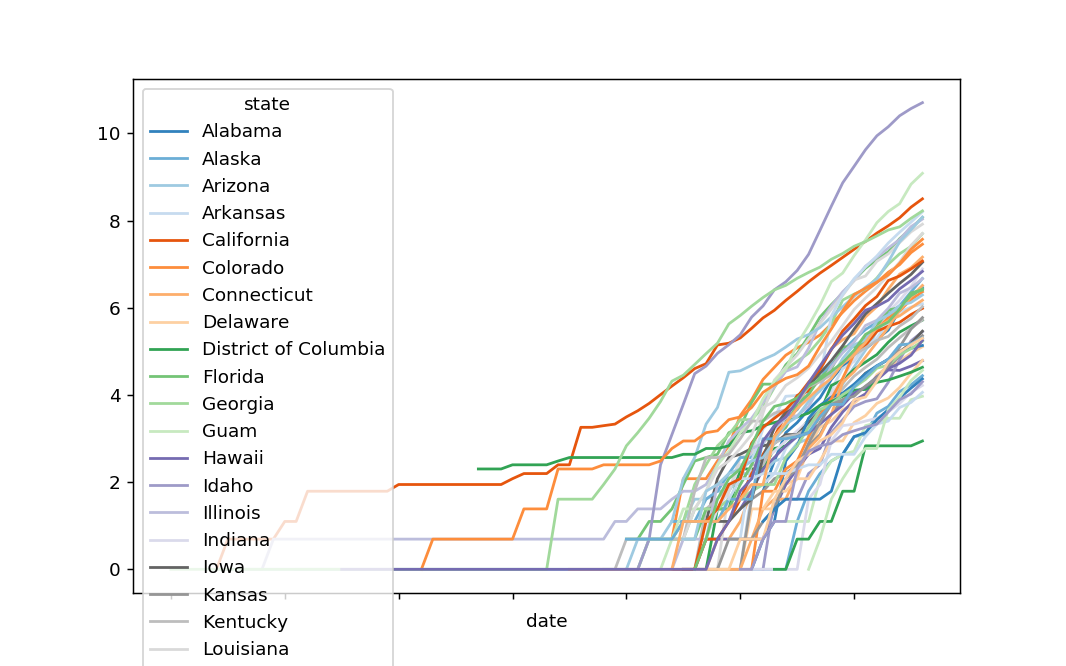

In [16]:
# Plot of the cases
p1 = d1.reset_index().pivot(index='date', columns='state', values='cases')
#p1.plot()
# log scale plot
p1.apply(np.log).plot()

<IPython.core.display.Javascript object>


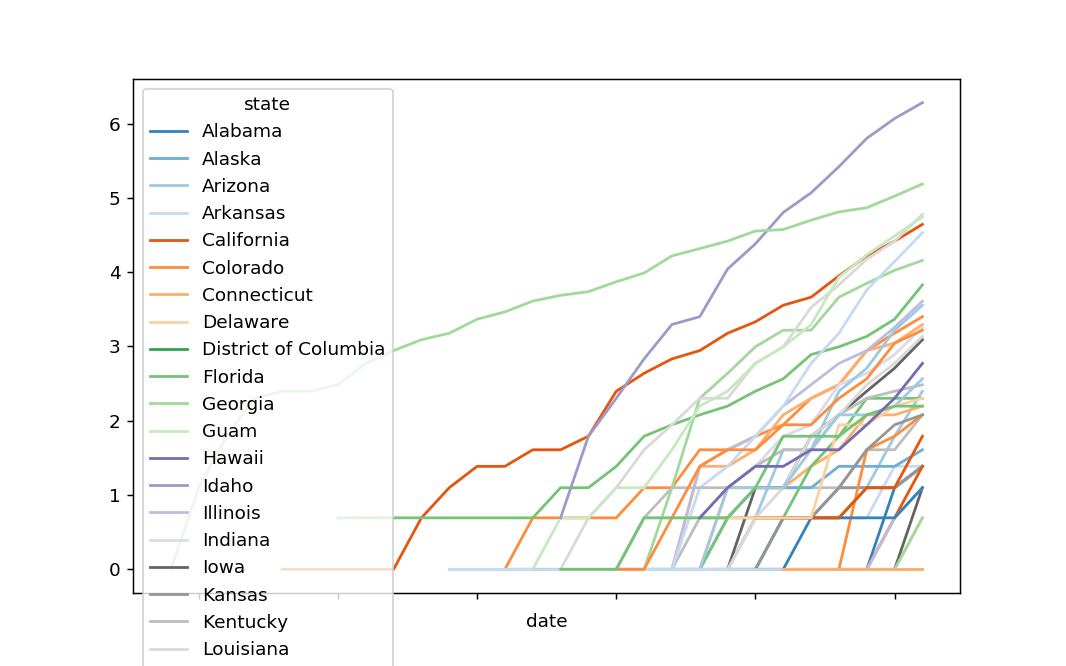

In [17]:
# plot of the deaths
p2 = d1.reset_index().pivot(index='date', columns='state', values='deaths')
#p1.plot()
# log scale plot
p2.apply(np.log).plot()

In [18]:
# shifting data to get plot from case #1 in each state
# get first valid index in each column (a serie)
f_index=p1.reset_index().apply(pd.Series.first_valid_index)
f_index

state
date                     0
Alabama                 52
Alaska                  51
Arizona                  5
Arkansas                50
California               4
Colorado                44
Connecticut             47
Delaware                50
District of Columbia    46
Florida                 40
Georgia                 41
Guam                    54
Hawaii                  45
Idaho                   52
Illinois                 3
Indiana                 45
Iowa                    47
Kansas                  46
Kentucky                45
Louisiana               48
Maine                   51
Maryland                44
Massachusetts           11
Michigan                49
Minnesota               45
Mississippi             50
Missouri                46
Montana                 52
Nebraska                27
Nevada                  44
New Hampshire           41
New Jersey              43
New Mexico              50
New York                40
North Carolina          42
North Dakota          

In [19]:
def shift_data(s):
    """Shift data of a column"""
    return s.shift(-f_index[s.name])
ps1 = p1.apply(shift_data)

In [20]:
ps1.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,6.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-22,12.0,1.0,1.0,6.0,2.0,8.0,2.0,4.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
2020-01-23,23.0,1.0,1.0,7.0,2.0,8.0,2.0,4.0,4.0,3.0,...,1.0,2.0,1.0,1.0,2.0,5.0,1.0,5.0,1.0,2.0
2020-01-24,29.0,1.0,1.0,9.0,2.0,8.0,3.0,4.0,4.0,3.0,...,3.0,2.0,1.0,1.0,2.0,8.0,1.0,8.0,1.0,3.0
2020-01-25,39.0,3.0,1.0,16.0,2.0,12.0,6.0,7.0,10.0,4.0,...,4.0,2.0,1.0,2.0,3.0,10.0,1.0,12.0,1.0,3.0


<IPython.core.display.Javascript object>


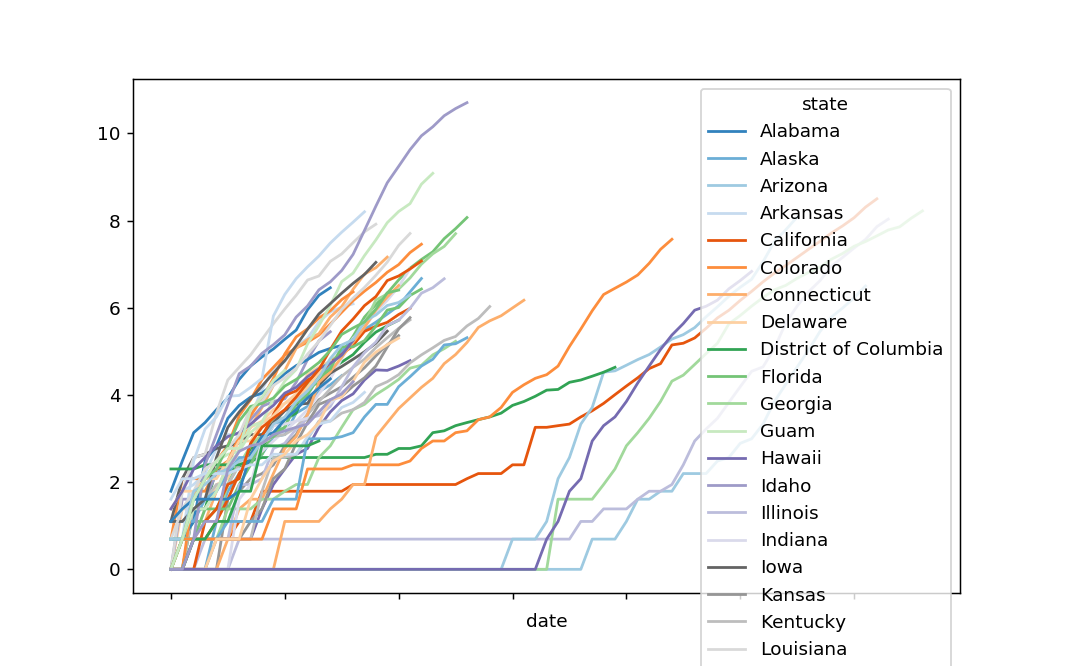

In [21]:
ps1.apply(np.log).plot()

<IPython.core.display.Javascript object>


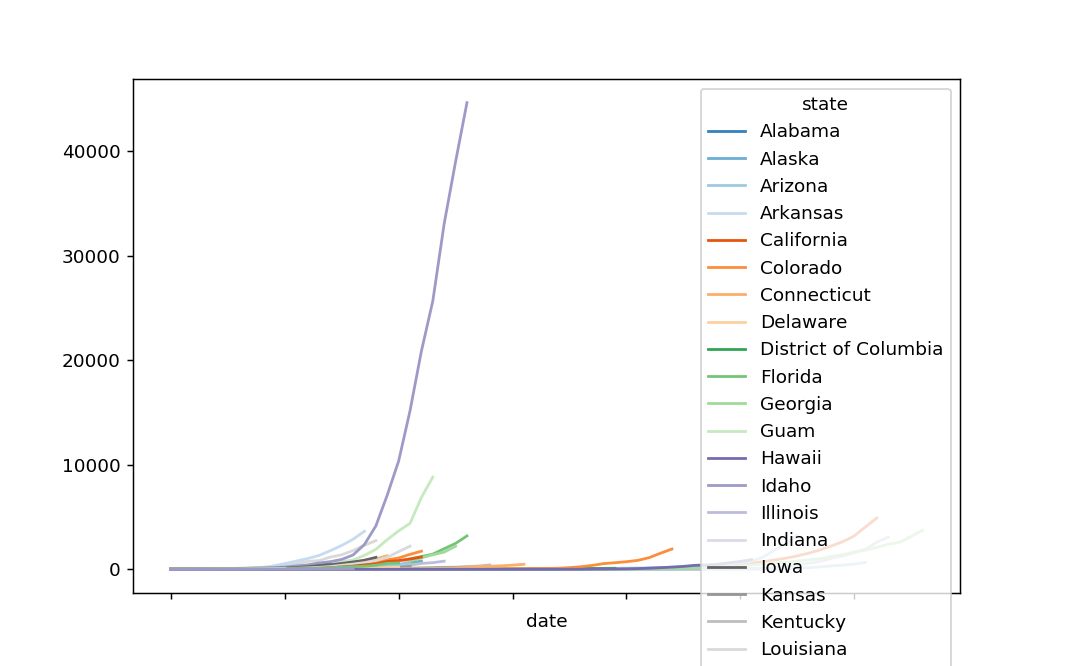

In [24]:
ps1.plot()

In [25]:
states = ['New York', 'California', 'Rhode Island', 'New Jersey', 'Washington', 'Kentucky', 'Louisiana']

<IPython.core.display.Javascript object>


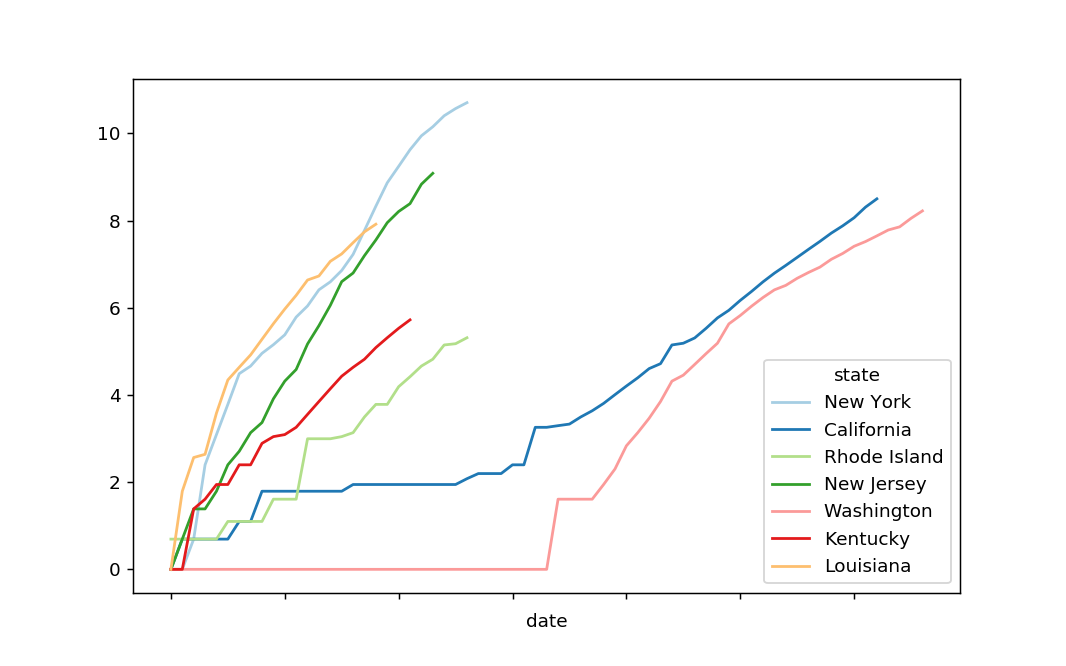

In [26]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)
ps1.apply(np.log)[states].plot()

<IPython.core.display.Javascript object>


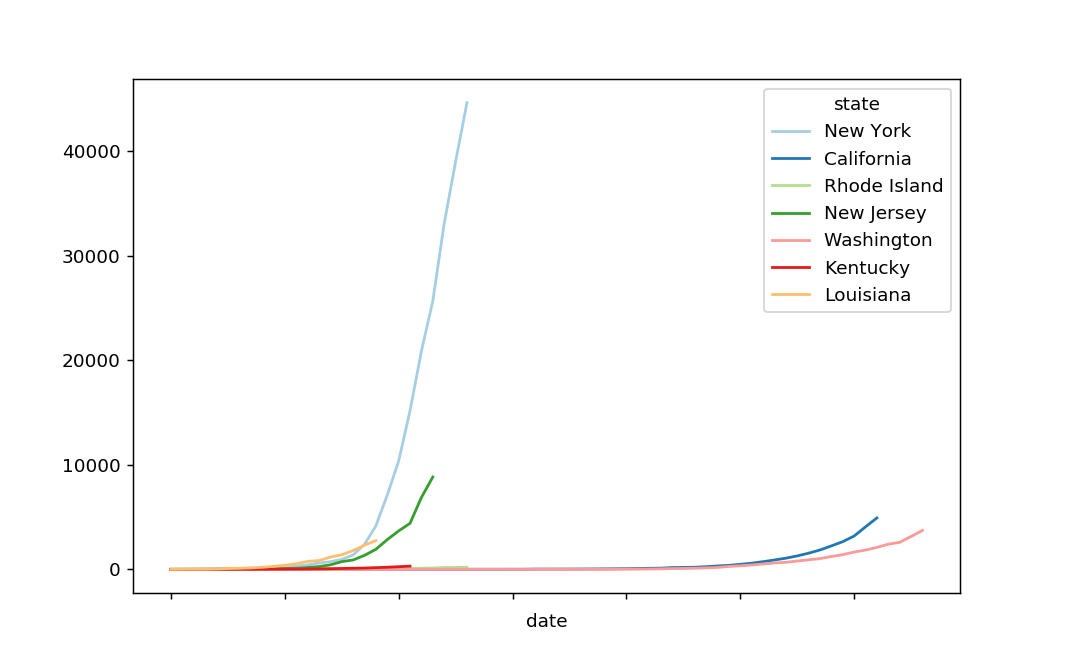

In [28]:
# non log scale
ps1[states].plot()

In [29]:
# Look at the data per county, in California
ca_filter = df['state'] == 'California'
ca_df = df[ca_filter][['date','county','cases','deaths']]

In [30]:
ca_df.groupby('county').sum().sort_values('cases', ascending=False)

,cases,deaths
county,,
Los Angeles,6759,100
Santa Clara,4391,145
San Diego,2423,11
San Francisco,1733,6
San Mateo,1648,26
Alameda,1581,13
Orange,1547,5
Sacramento,1032,48
Contra Costa,987,9


In [31]:
ca_d1 = ca_df.groupby(['date','county']).sum()\
.sort_values(['date','cases'], ascending=[True, False])
ca_d1.tail(50)

cases  deaths
date       county                        
2020-03-26 Mendocino            2       0
           Sutter               2       0
           Unknown              1       0
2020-03-27 Los Angeles       1465      27
           Santa Clara        574      21
           San Diego          417       5
           Orange             321       3
           San Francisco      282       3
           Alameda            241       4
           San Mateo          239       6
           Riverside          185       8
           Sacramento         164       6
           Contra Costa       151       2
           San Joaquin         93       4
           Ventura             83       3
           Marin               69       1
           San Bernardino      64       3
           San Luis Obispo     59       0
           Sonoma              50       1
           Santa Barbara       47       0
           Kern                41       1
           Placer              41       1
           Solano              39       0
           Santa Cruz          34       0
           Fresno              31       0
           Monterey            27       1
           Tulare              24       0
           Stanislaus          23       0
           Imperial            21       0
           Yolo                16       1
           Humboldt            14       0
           El Dorado           12       0
           Nevada              12       0
           Madera              11       1
           San Benito          11       1
           Napa                10       0
           Mono                 8       0
           Merced               7       0
           Butte                5       0
           Inyo                 5       0
           Calaveras            3       0
           Shasta               3       1
           Siskiyou             3       0
           Yuba                 3       0
           Amador               2       0
           Mendocino            2       0
           Sutter               2       0
           Colusa               1       0
           Kings                1       0
           Unknown              1       0

<IPython.core.display.Javascript object>


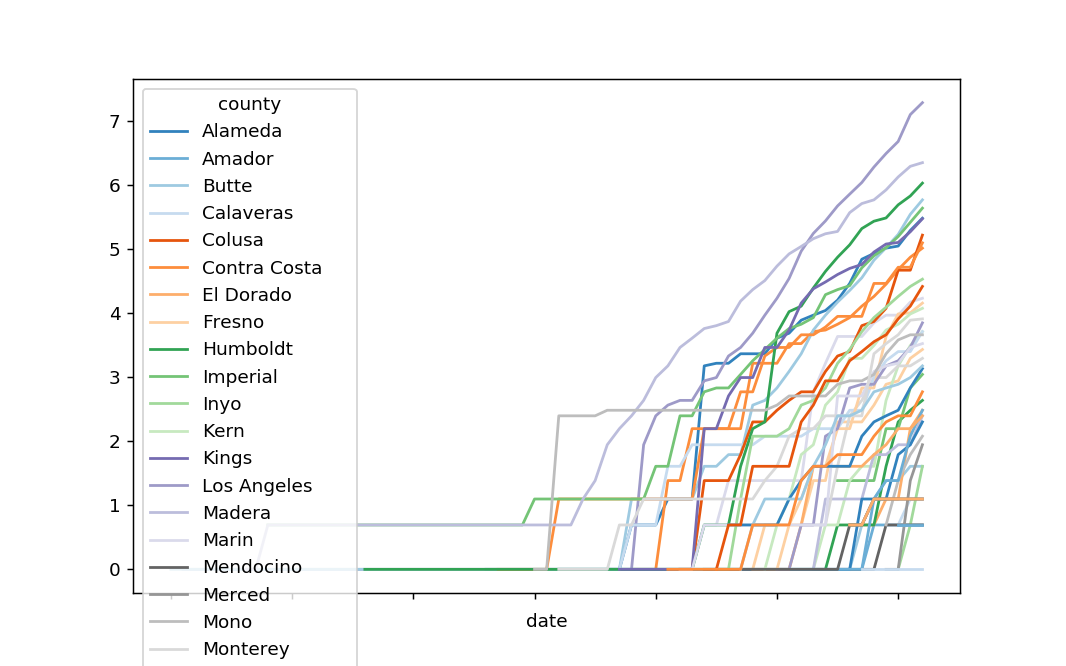

In [32]:
# Plot of the cases
ca_p1 = ca_d1.reset_index().pivot(index='date', columns='county', values='cases')
#p1.plot()
# log scale plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20c.colors)
ca_p1.apply(np.log).plot()

In [33]:
# shifting data to get plot from case #1 in each state
# get first valid index in each column (a serie)
ca_f_index=ca_p1.reset_index().apply(pd.Series.first_valid_index)

In [34]:
def shift_data(s):
    """Shift data of a column"""
    return s.shift(-ca_f_index[s.name])
ca_ps1 = ca_p1.apply(shift_data)

<IPython.core.display.Javascript object>


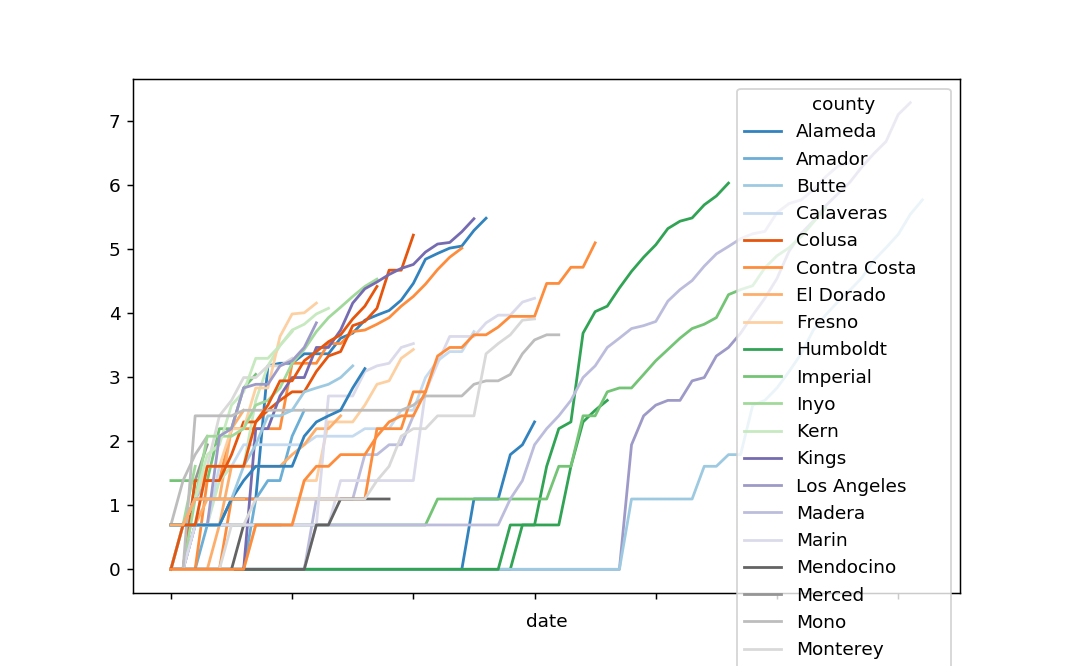

In [35]:
ca_ps1.apply(np.log).plot()

In [36]:
counties = ['Alameda', 'Santa Cruz', 'Santa Clara', 'Monterey', 'San Francisco', 'San Mateo']

<IPython.core.display.Javascript object>


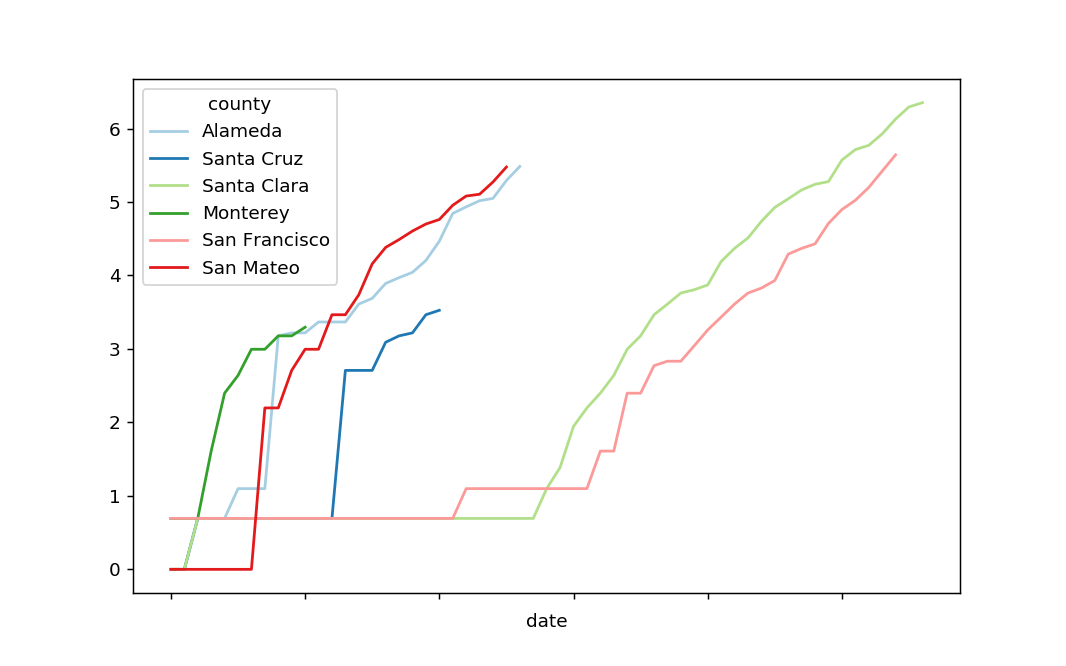

In [37]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)
ca_ps1.apply(np.log)[counties].plot()

<IPython.core.display.Javascript object>


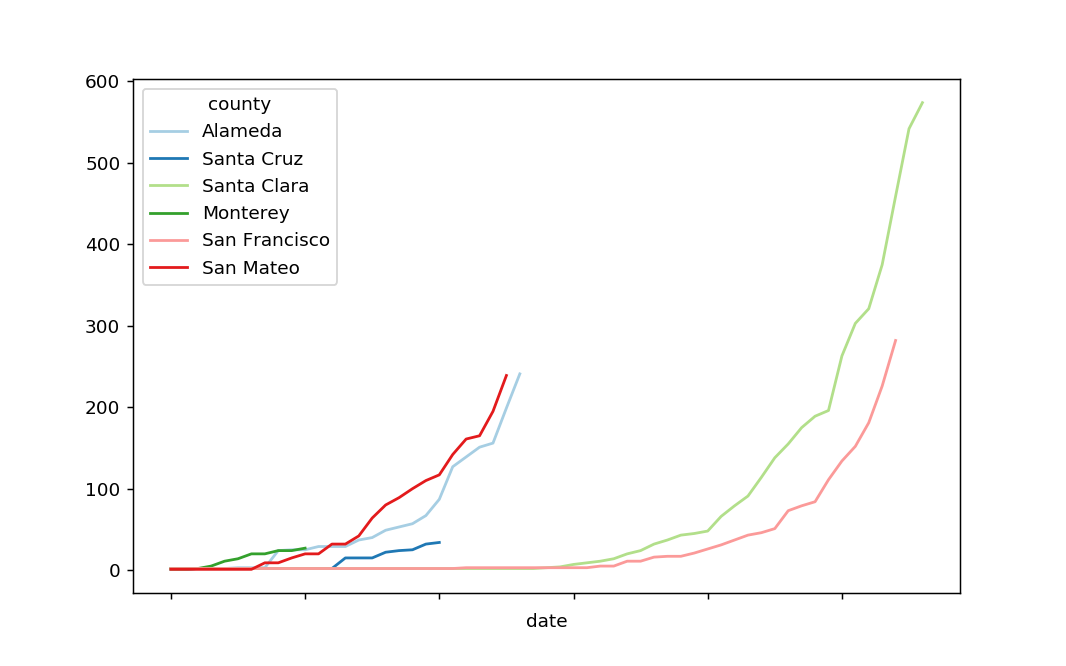

In [38]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)
ca_ps1[counties].plot()